In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
import pandas as pd

In [2]:
path = "C:\\Windows\\Fonts\\H2GPRM.TTF"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)


In [3]:
file_path = './ref/행정구역시도성연령별취업자_20250304.csv'
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [8]:
ex1_data = ori.copy()
# 컬럼명이 직관적이지 않거나 일관성이 부족할 경우, 분석에 적합한 형태로 변경하기 위해 재정의함
ex1_data.columns = ['resion','year','age','gender','value']
# ex1_data['resion'] == '세종특별자치시' → 'resion' 컬럼에서 값이 '세종특별자치시'인 행을 찾음
# .loc[조건, 'value'] → 해당하는 행들의 'value' 컬럼만 선택
# 변환된 값을 원래 ex1_data['value'] 컬럼에 다시 저장하여 데이터프레임을 업데이트
ex1_data.loc[ex1_data['resion']=='세종특별자치시','value'] = ex1_data.loc[ex1_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시의 인구 수가  -로 표현되어 있어서 전처리 과정을 거침
ex1_data['year'] = ex1_data['year'].astype(str).str.replace('.', '/')
ex1_data

,resion,year,age,gender,value
0,서울특별시,2014/1/4,20 - 29세,남자,331
1,서울특별시,2014/1/4,20 - 29세,여자,460
2,서울특별시,2014/1/4,30 - 39세,남자,774
3,서울특별시,2014/1/4,30 - 39세,여자,519
4,서울특별시,2014/1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024/4/4,40 - 49세,여자,44
7436,제주도,2024/4/4,50 - 59세,남자,54
7437,제주도,2024/4/4,50 - 59세,여자,47
7438,제주도,2024/4/4,60세이상,남자,49


In [11]:
ex1_data['value'] = ex1_data['value'].astype(int)

# 그룹별로 value 컬럼 값을 합산
# 즉, 같은 year에 속하는 value 값들의 총합을 계산
ex2_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex2_data

,year,total
0,2014/1/4,24955
1,2014/2/4,25866
2,2014/3/4,25969
3,2014/4/4,25847
4,2015/1/4,25295
5,2015/2/4,26114
6,2015/3/4,26214
7,2015/4/4,26148
8,2016/1/4,25502
9,2016/2/4,26320


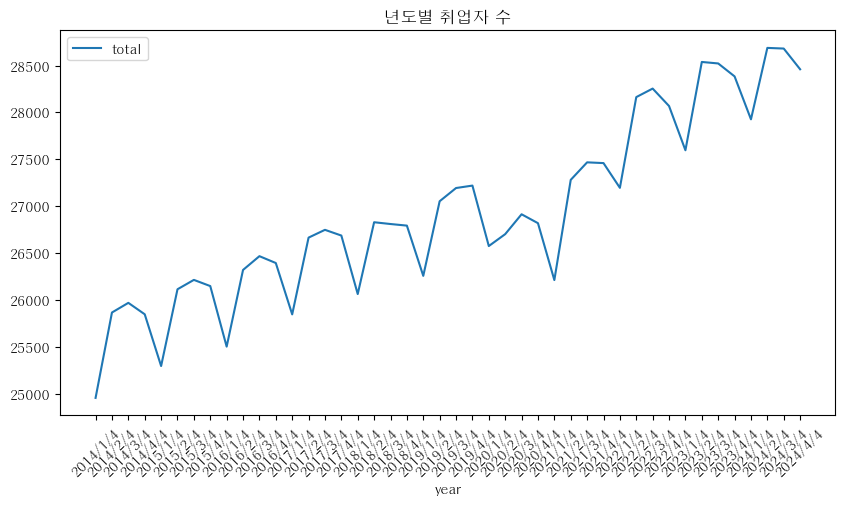

In [13]:
ax = ex2_data.plot(x='year', y='total', figsize=(10,5), title='년도별 취업자 수')
# 데이터 개수만큼 눈금 위치를 [0, 1, 2, 3, ...] 형태로 지정 이렇게 하면 모든 연도가 일정한 간격으로 x축에 표시됨
ax.set_xticks(range(len(ex2_data)))
# 눈금 위치(set_xticks())를 숫자로 지정했으므로, 실제 연도 값을 표시하려면 set_xticklabels()를 함께 사용해야 해.
ax.set_xticklabels(ex2_data['year'],rotation=45)
plt.show()

In [15]:
m = ex1_data.groupby('gender').get_group('남자')
wm = ex1_data.groupby('gender').get_group('여자')

# pd.concat() → 여러 개의 데이터프레임을 합치는 함수
# axis=0 → 행(row) 방향으로 합친다는 의미 (위아래로 쌓음)
gender1 = pd.concat([m,wm], axis = 0)
gender1

,resion,year,age,gender,value
0,서울특별시,2014/1/4,20 - 29세,남자,331
2,서울특별시,2014/1/4,30 - 39세,남자,774
4,서울특별시,2014/1/4,40 - 49세,남자,773
6,서울특별시,2014/1/4,50 - 59세,남자,664
8,서울특별시,2014/1/4,60세이상,남자,352
...,...,...,...,...,...
7431,제주도,2024/4/4,20 - 29세,여자,17
7433,제주도,2024/4/4,30 - 39세,여자,29
7435,제주도,2024/4/4,40 - 49세,여자,44
7437,제주도,2024/4/4,50 - 59세,여자,47


In [16]:
ex3_data = ori.copy()
ex3_data.columns = ['resion','year','age','gender','value']
ex3_data.loc[ex1_data['resion']=='세종특별자치시','value'] = ex3_data.loc[ex1_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시의 인구 수가  -로 표현되어 있어서 전처리 과정을 거침
ex3_data['year'] = ex3_data['year'].astype(str).str.replace('.', '/')
ex3_data

,resion,year,age,gender,value
0,서울특별시,2014/1/4,20 - 29세,남자,331
1,서울특별시,2014/1/4,20 - 29세,여자,460
2,서울특별시,2014/1/4,30 - 39세,남자,774
3,서울특별시,2014/1/4,30 - 39세,여자,519
4,서울특별시,2014/1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024/4/4,40 - 49세,여자,44
7436,제주도,2024/4/4,50 - 59세,남자,54
7437,제주도,2024/4/4,50 - 59세,여자,47
7438,제주도,2024/4/4,60세이상,남자,49


In [23]:
ex3_data['value'] = ex3_data['value'].astype(int)
gen = ex3_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen
ex3_data

,resion,year,age,gender,value
0,서울특별시,2014/1/4,20 - 29세,남자,331
1,서울특별시,2014/1/4,20 - 29세,여자,460
2,서울특별시,2014/1/4,30 - 39세,남자,774
3,서울특별시,2014/1/4,30 - 39세,여자,519
4,서울특별시,2014/1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024/4/4,40 - 49세,여자,44
7436,제주도,2024/4/4,50 - 59세,남자,54
7437,제주도,2024/4/4,50 - 59세,여자,47
7438,제주도,2024/4/4,60세이상,남자,49


In [19]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

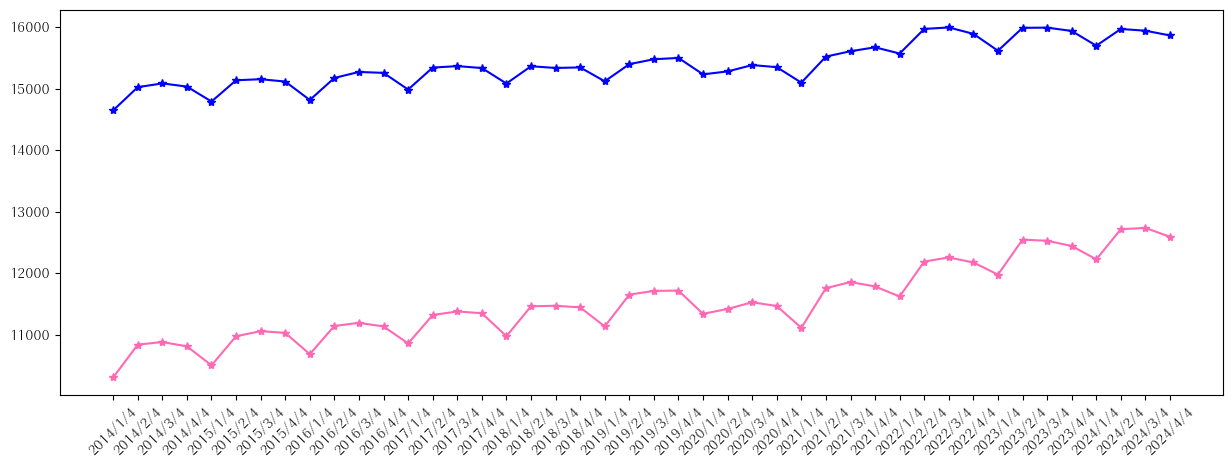

In [22]:
plt.figure(figsize=(15,5))
plt.plot(male['year'],male['total'],label='남자',color='blue',ls='-',marker='*')
plt.plot(female['year'],female['total'],label='여자',color='hotpink',ls='-',marker='*')
# ax는 여러개, 한개 모두 가능하지만 plt는 한개만 가능함
plt.xticks(range(len(ex2_data)))
plt.xticks(ex2_data['year'],rotation=45)
plt.show()

In [40]:
ex4_data = ori.copy()
# :는 모든 행을 의미. '데이터'는 선택하려는 열 이름.
ex4_data.loc[:,'데이터']= ex4_data.loc[:,'데이터'].replace('-',0)
ex4_data.loc[:,'데이터']= ex4_data.loc[:,'데이터'].astype(int)
ex4_data['시점'] = ex4_data['시점'].astype(str).str.replace('.', '/')
ex4_data

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014/1/4,20 - 29세,남자,331
1,서울특별시,2014/1/4,20 - 29세,여자,460
2,서울특별시,2014/1/4,30 - 39세,남자,774
3,서울특별시,2014/1/4,30 - 39세,여자,519
4,서울특별시,2014/1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024/4/4,40 - 49세,여자,44
7436,제주도,2024/4/4,50 - 59세,남자,54
7437,제주도,2024/4/4,50 - 59세,여자,47
7438,제주도,2024/4/4,60세이상,남자,49


In [26]:
filter1 = (ex4_data['시점']>='2018/1/4') & (ex4_data['시점'] <'2019/1/4')
ex4_data[filter1]
ex4_data.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014/1/4,20 - 29세,남자,331
1,서울특별시,2014/1/4,20 - 29세,여자,460
2,서울특별시,2014/1/4,30 - 39세,남자,774
3,서울특별시,2014/1/4,30 - 39세,여자,519
4,서울특별시,2014/1/4,40 - 49세,남자,773


In [36]:
# filter1 = ex3_data['연령계층별'].isin(['20 - 29세'])
# filter2 = ex3_data['연령계층별'].isin(['60세이상'])

x_data = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
y_data = ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]
z_data = ex4_data

x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 60대 취업자
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 전체 취업자 수
z

시도별
강원도         34616
경기도        303811
경상남도        75520
경상북도        63011
광주광역시       32635
대구광역시       53606
대전광역시       33927
부산광역시       73294
서울특별시      224277
세종특별자치시      5684
울산광역시       24914
인천광역시       68506
전라남도        42789
전라북도        41185
제주도         16299
충청남도        52483
충청북도        38617
Name: 데이터, dtype: object

In [37]:
import numpy as np
regions = list(x.index) # 라벨
color = [np.random.rand(3,) for _ in range(len(regions))] # 랜덤 색상 color
# colors = list(color)

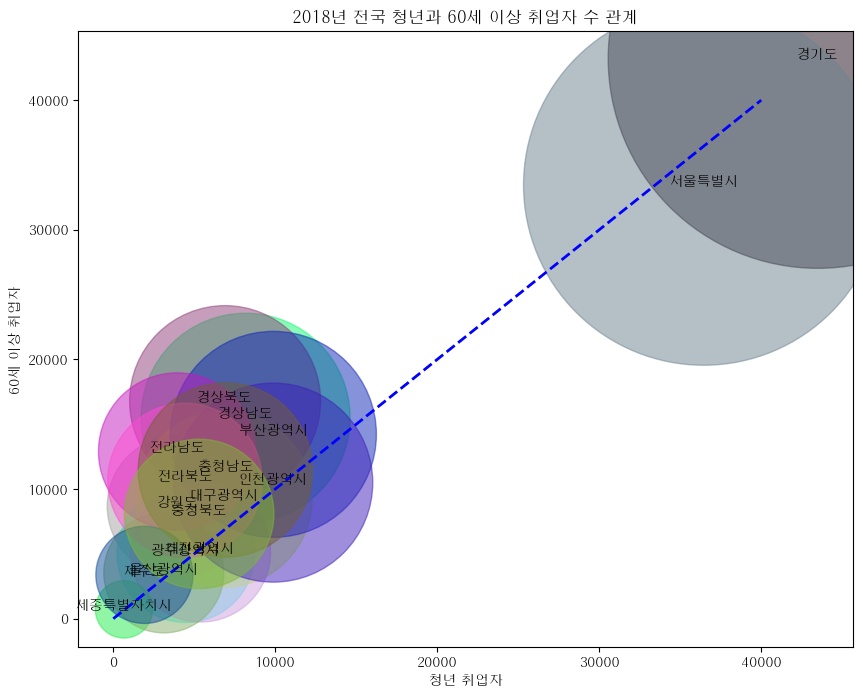

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
z = np.array(z,dtype=float)
scatter = ax.scatter(x,y,s=z*0.3,color=color,alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n],xy=(x.iloc[n],y.iloc[n]), ha='center')

ax.plot([0,40000],[0,40000], color='b', linestyle='--', linewidth=2)

ax.set_title('2018년 전국 청년과 60세 이상 취업자 수 관계')
ax.set_xlabel('청년 취업자')
ax.set_ylabel('60세 이상 취업자')
plt.show()

In [41]:
ex5_data = ori.copy()
ex5_data.loc[:,'데이터']= ex5_data.loc[:,'데이터'].replace('-',0)
ex5_data.loc[:,'데이터']= ex5_data.loc[:,'데이터'].astype(int)
ex5_data['시점'] = ex5_data['시점'].astype(str).str.replace('.', '/')
ex5_data

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014/1/4,20 - 29세,남자,331
1,서울특별시,2014/1/4,20 - 29세,여자,460
2,서울특별시,2014/1/4,30 - 39세,남자,774
3,서울특별시,2014/1/4,30 - 39세,여자,519
4,서울특별시,2014/1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024/4/4,40 - 49세,여자,44
7436,제주도,2024/4/4,50 - 59세,남자,54
7437,제주도,2024/4/4,50 - 59세,여자,47
7438,제주도,2024/4/4,60세이상,남자,49


In [42]:
filter2 = (ex5_data['시점']>='2024/1/4') & (ex5_data['시점'] <='2024/4/4')
ex5_data = ex5_data[filter2]
ex5_data

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024/1/4,20 - 29세,남자,366
401,서울특별시,2024/1/4,20 - 29세,여자,518
402,서울특별시,2024/1/4,30 - 39세,남자,635
403,서울특별시,2024/1/4,30 - 39세,여자,571
404,서울특별시,2024/1/4,40 - 49세,남자,617
...,...,...,...,...,...
7435,제주도,2024/4/4,40 - 49세,여자,44
7436,제주도,2024/4/4,50 - 59세,남자,54
7437,제주도,2024/4/4,50 - 59세,여자,47
7438,제주도,2024/4/4,60세이상,남자,49


In [43]:
x1_data = ex5_data[ex5_data['연령계층별'].isin(['20 - 29세'])]
y1_data = ex5_data[ex5_data['연령계층별'].isin(['60세이상'])]
z1_data = ex5_data

x = x1_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 20대 취업자
y = y1_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 60대 취업자
z = z1_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 전체 취업자 수

In [44]:
regions = list(x.index) # 라벨
color = [np.random.rand(3,) for _ in range(len(regions))] # 랜덤 색상 color
# colors = list(color)

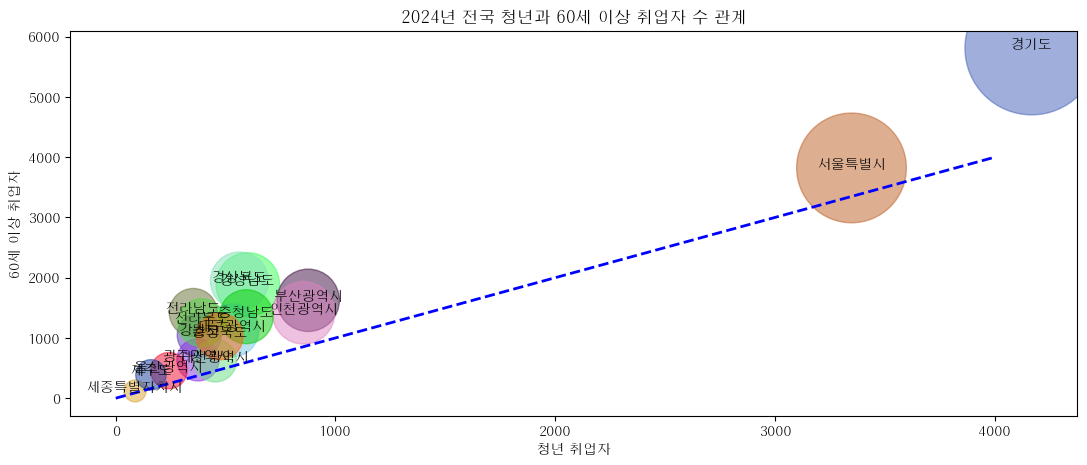

In [45]:
fig, ax = plt.subplots(figsize=(13,5))
z = np.array(z,dtype=float)
scatter = ax.scatter(x,y,s=z*0.3,color=color,alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n],xy=(x.iloc[n],y.iloc[n]), ha='center')

ax.plot([0,4000],[0,4000], color='b', linestyle='--', linewidth=2)

ax.set_title('2024년 전국 청년과 60세 이상 취업자 수 관계')
ax.set_xlabel('청년 취업자')
ax.set_ylabel('60세 이상 취업자')
plt.show()

In [53]:
from prophet import Prophet

In [52]:
#!pip install prophet
# !pip install --upgrade plotly
# !pip install tqdm
# !pip install --upgrade jupyter ipywidgets

In [54]:
ex6_data = ori.copy()
ex6_data.loc[:,'데이터']= ex6_data.loc[:,'데이터'].replace('-',0)
ex6_data.loc[:,'데이터']= ex6_data.loc[:,'데이터'].astype(int)
ex6_data['시점'] = ex6_data['시점'].astype(str).str.replace('.', '/')
ex6_data

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014/1/4,20 - 29세,남자,331
1,서울특별시,2014/1/4,20 - 29세,여자,460
2,서울특별시,2014/1/4,30 - 39세,남자,774
3,서울특별시,2014/1/4,30 - 39세,여자,519
4,서울특별시,2014/1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024/4/4,40 - 49세,여자,44
7436,제주도,2024/4/4,50 - 59세,남자,54
7437,제주도,2024/4/4,50 - 59세,여자,47
7438,제주도,2024/4/4,60세이상,남자,49


In [55]:
ex6_data['데이터'] = ex6_data['데이터'].astype(int)
ex6_data = ex6_data.groupby('시점')['데이터'].sum().reset_index(name='total')
ex6_data

,시점,total
0,2014/1/4,24955
1,2014/2/4,25866
2,2014/3/4,25969
3,2014/4/4,25847
4,2015/1/4,25295
5,2015/2/4,26114
6,2015/3/4,26214
7,2015/4/4,26148
8,2016/1/4,25502
9,2016/2/4,26320


In [56]:
ex6_data['시점'] = pd.to_datetime(ex6_data['시점'], format='%Y/%m/%d')
ex6_data = ex6_data.rename(columns={'시점': 'ds', 'total': 'y'})
ex6_data.head()

,ds,y
0,2014-01-04,24955
1,2014-02-04,25866
2,2014-03-04,25969
3,2014-04-04,25847
4,2015-01-04,25295


In [57]:
m = Prophet()
m.fit(ex6_data)

21:54:20 - cmdstanpy - INFO - Chain [1] start processing
21:54:21 - cmdstanpy - INFO - Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

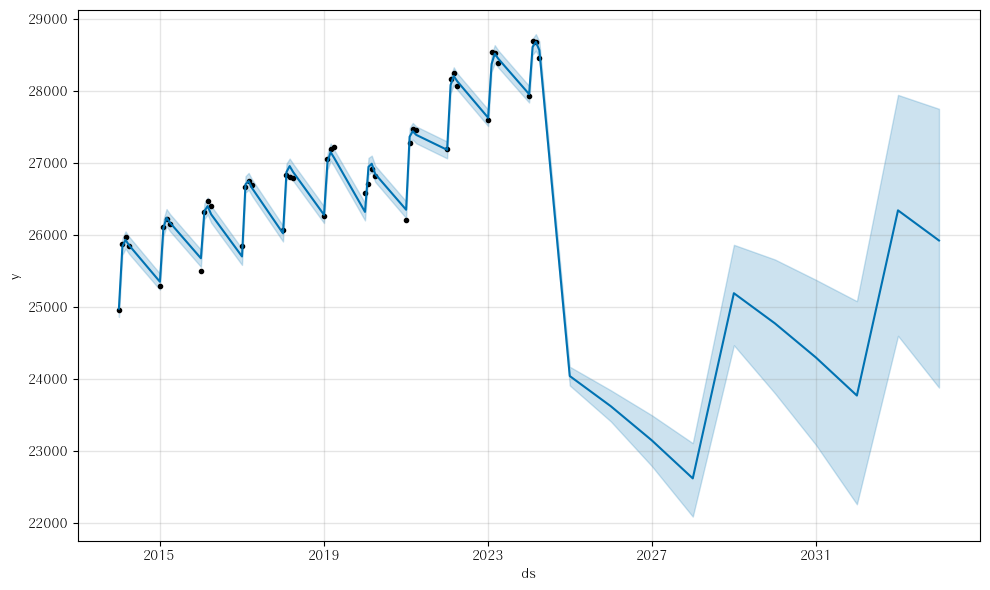

In [58]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/예측.png')
plt.show